In [1]:
pwd

'/Users/yashluharuka/Downloads/Bike assignment'

In [2]:
# Importing Libraries
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [3]:
## reading and understanding dataset
bike_data = pd.read_csv('day.csv')

In [4]:
##Check data

In [5]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_data.shape

(730, 16)

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


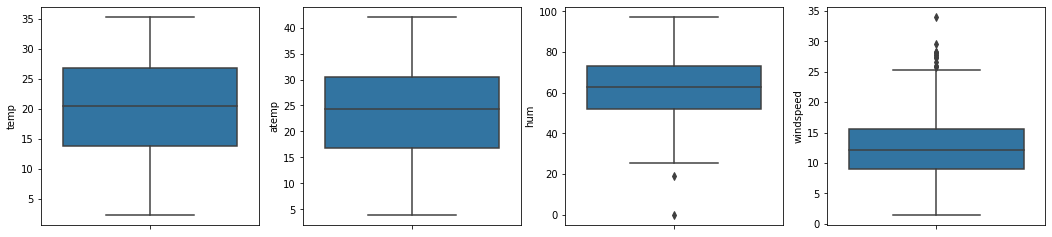

In [9]:
# now let us draw box plots for independent variables with continous values..

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

After inspection of various data frames and plots it can be concluded that there are no oultiers as the difference between mean and median is little 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [11]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
#Convert season and weathersit to categorical types
#Convert Month and weekday
bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_data.mnth = bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_data.weekday = bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


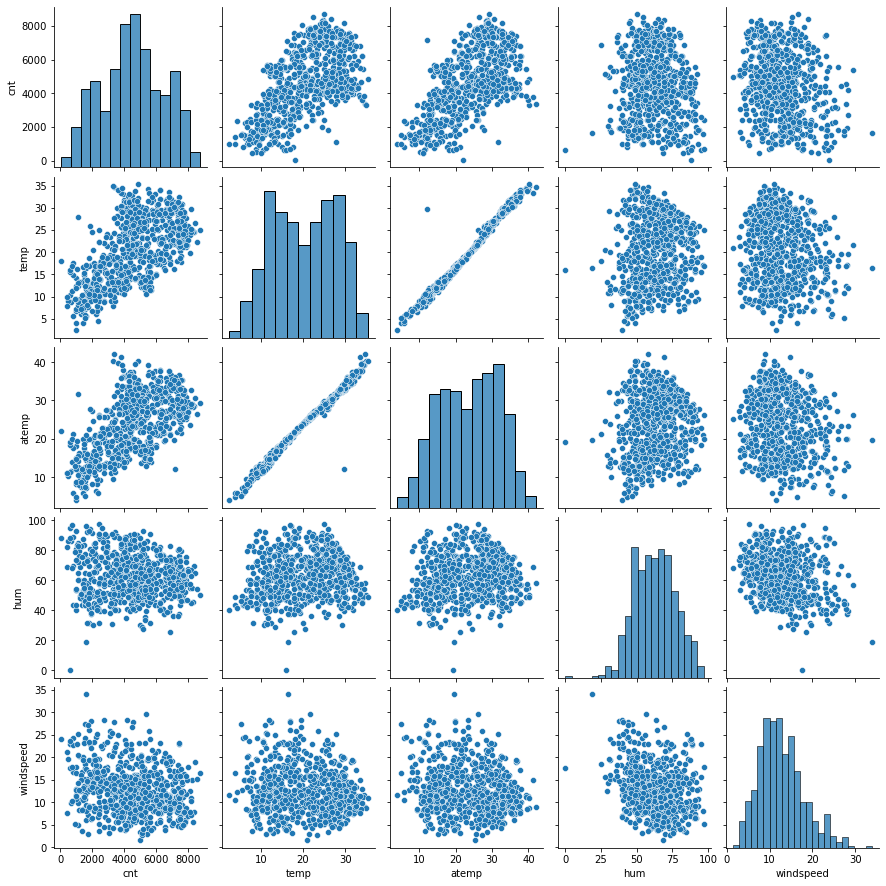

In [13]:
## Check linear relationship for continuous numeric variables 
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

According to pairplots atemp and temp is co-related

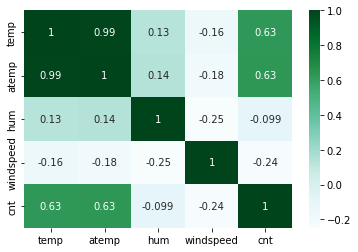

In [14]:
# now let us check relationship with continuos variables 
# Checking continuous variables relationship with each other
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

according to heatmap atemp and temp are highly correlated as they are more 0.99 and approximately 1

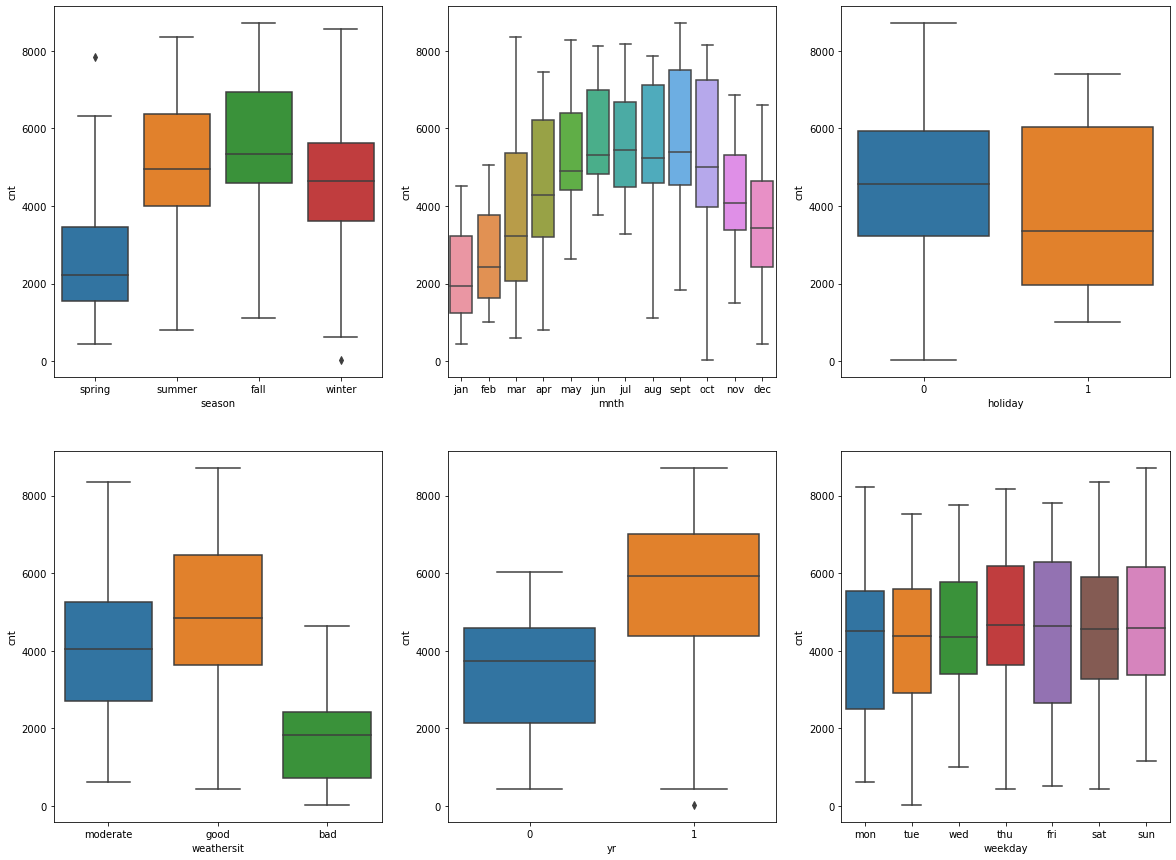

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()


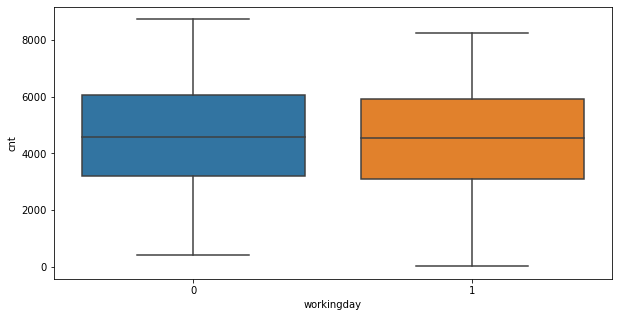

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

Inference
1. Highest demand in bikes is in fall season, starting from jan and reaching its peak in september
2. Demand is growing from previous year
3. Holiday leads to low demand
4. Weekday and workingday is volotaile, yet similar respectively.Therefore, no inferences can be drawn 
5. Good weather contributes to a good demand. 
6. Further inferences can be drawn that till September the weather is good and after which its bad therefore low demand after September. 

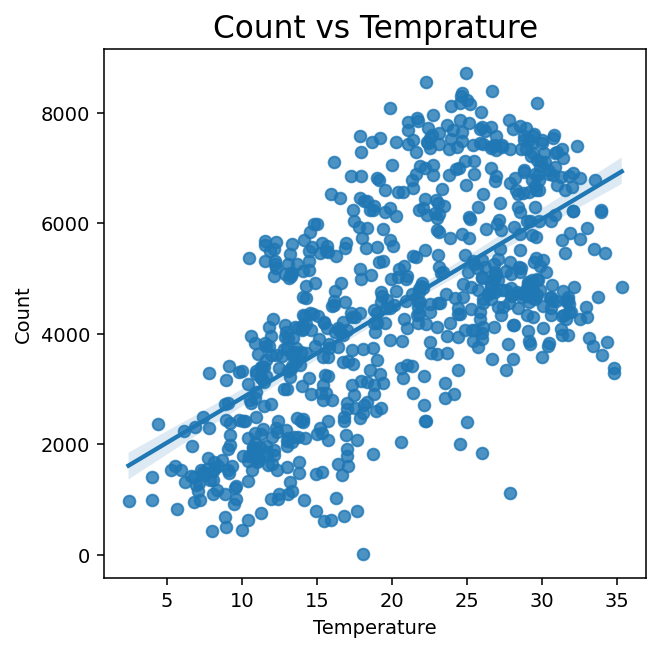

In [17]:
plt.figure(figsize=(5,5),dpi=140)
plt.title("Count vs Temprature",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

Clear indication that high temprature results to better demand, conclusion can be drawn that they are linear relation between cnt and temp 

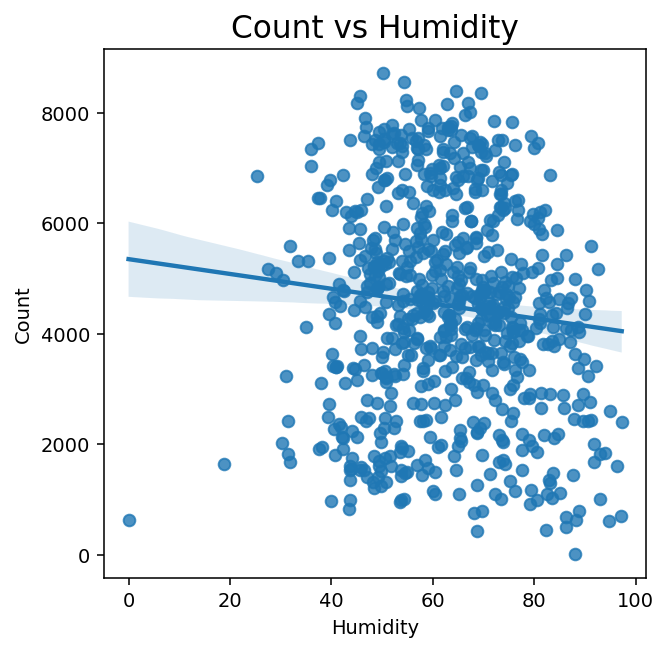

In [18]:
plt.figure(figsize=(5,5),dpi=140)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

While Humidty values are scattered, the inference can be drawn that increase in humidity results to decreasing count 

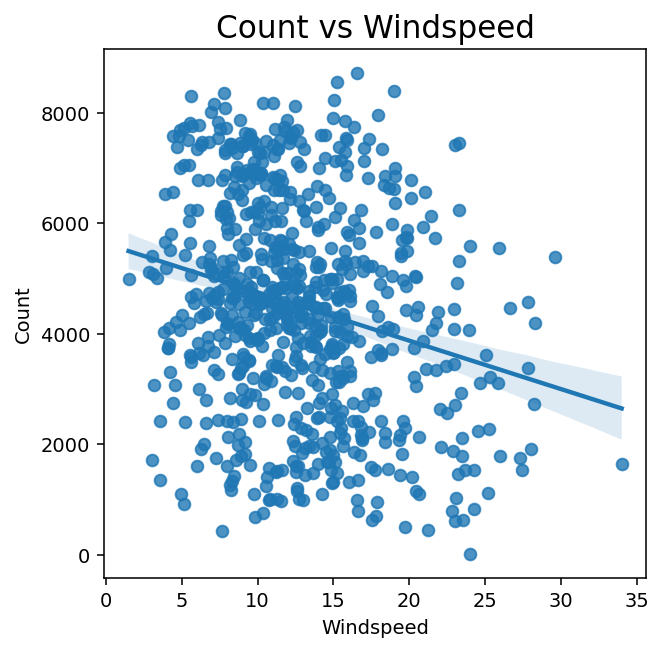

In [19]:
plt.figure(figsize=(5,5),dpi=140)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

While Windspeed values are scattered, the inference can be drawn that increase in Windspeed results to decreasing count 

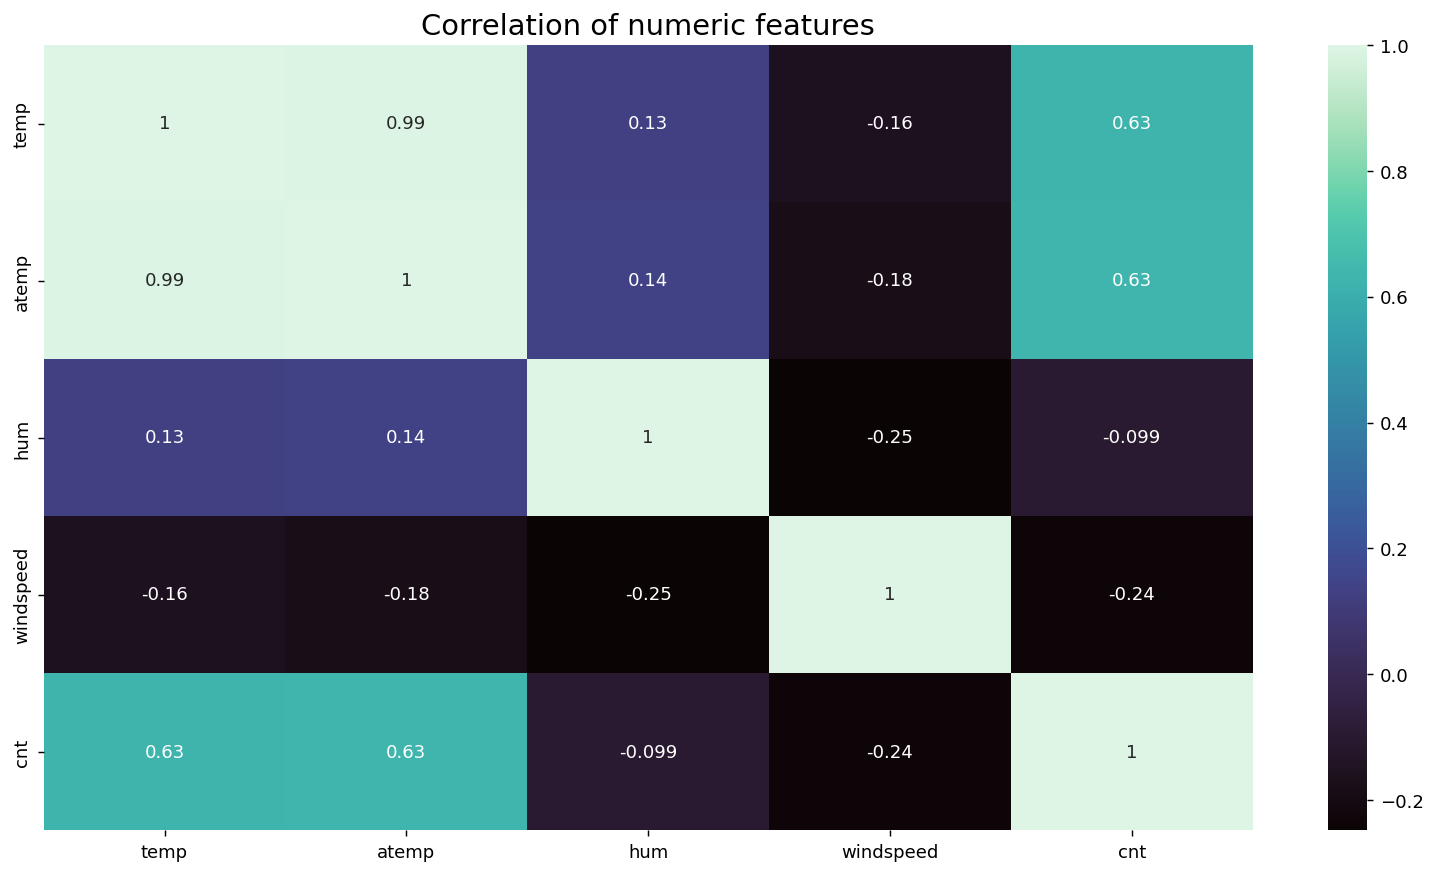

In [20]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike_data[num_features].corr(),annot= True,cmap="mako")
plt.show()

According to heatmap as atemp and temp are highly coorelated we can remove one

In [21]:
bike_data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation for Linear Regression

In [22]:
# Introduce new variable Lifespan, instead of dropping date which highlights how old is the business
bike_data['Lifespan'] = (pd.to_datetime(bike_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [23]:
#Dropping instant nothing to do with target 
#Dropping dteday as we have month and weeks 
#Dropping casual and registered as we have countnothing to do with target
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Lifespan
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


## create dummies for categorical variables

In [24]:
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [25]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Lifespan', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [26]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Lifespan,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [27]:
bike_data.shape

(730, 32)

In [28]:
#Splitting the Data into Training and Testing Sets

#y to contain only target variable
y=bike_data.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_data

#Train Test split with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

(584, 31)
(146, 31)


### Rescaling to the same scale

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [31]:
#Rescaling the Features
# Scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','Lifespan']
#Normalize scaler to scale
scaler = MinMaxScaler()
#Transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Lifespan,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
247,0,1,0,0.765327,0.717455,0.814513,0.475900,0.338820,0,0,...,1,0,0,0,0,0,1,0,0,1
335,0,0,0,0.317788,0.331261,0.644911,0.195963,0.459534,0,0,...,0,0,0,1,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,0.962963,0,0,...,0,0,0,0,0,0,1,0,1,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,0.603567,1,0,...,0,0,0,1,0,0,0,0,0,1
136,0,0,1,0.626185,0.603102,0.863461,0.637592,0.186557,0,1,...,0,0,0,0,1,0,0,0,0,1


## Build a Model using RFE and Automated approach

In [33]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [35]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Lifespan', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 3),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 9),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 4),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 2)]

### Elimination

In [36]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### VIF calculation

In [37]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [38]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [39]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [40]:
X_train_srfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']]

In [41]:
X_train_srfe.shape

(584, 15)

# Models

## Model 1 = Variables Selected by RFE

In [42]:
col = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.5
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.26e-209
Time:                        21:52:02   Log-Likelihood:                -4730.4
No. Observations:                 584   AIC:                             9493.
Df Residuals:                     568   BIC:                             9563.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3368.3350    325.433     

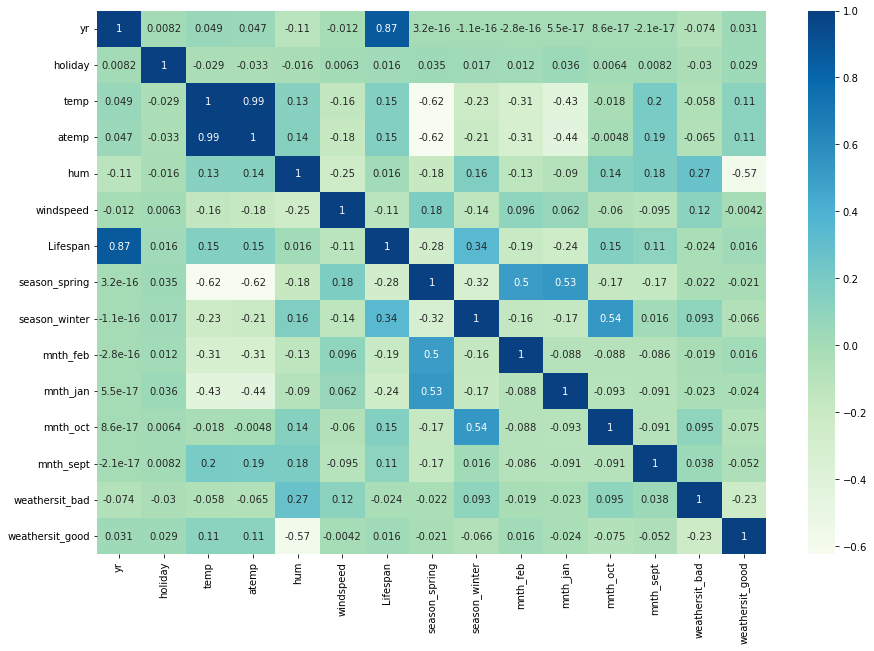

In [43]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_data[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2 - Eliminate high p-value variable

In [44]:
#Drop JAN as high p-value and negative coeffecient
col = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.02e-207
Time:                        21:52:03   Log-Likelihood:                -4737.7
No. Observations:                 584   AIC:                             9505.
Df Residuals:                     569   BIC:                             9571.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3135.6857    323.318     

## Model 3 - Eliminate p-value >0.05

In [45]:
# Dropping humidity and holiday as p-value greater than 0.05
col = ['yr', 'temp', 'atemp', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     217.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.00e-203
Time:                        21:52:03   Log-Likelihood:                -4752.7
No. Observations:                 584   AIC:                             9531.
Df Residuals:                     571   BIC:                             9588.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2142.9834    233.558     

## Model 4 - Eliminate VIF is high

In [46]:
# Drop the variable temp and atemp as VIF is high
col = ['yr', 'windspeed', 'Lifespan',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          6.92e-174
Time:                        21:52:03   Log-Likelihood:                -4828.7
No. Observations:                 584   AIC:                             9679.
Df Residuals:                     573   BIC:                             9727.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4357.0274    172.645     

## Model 5

In [47]:
## Replace July with spring as both were highly correlated

col = ['yr', 'windspeed', 'Lifespan',
       'mnth_jul', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     84.70
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          4.48e-106
Time:                        21:52:03   Log-Likelihood:                -4988.8
No. Observations:                 584   AIC:                         1.000e+04
Df Residuals:                     573   BIC:                         1.005e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2841.5910    206.967     

## Model 6

In [48]:
## Replace windspeed with spring as windspeed was highly correlated with temp

col = ['yr', 'season_spring', 'Lifespan',
       'mnth_jul', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.49e-166
Time:                        21:52:03   Log-Likelihood:                -4846.5
No. Observations:                 584   AIC:                             9715.
Df Residuals:                     573   BIC:                             9763.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3693.2644    143.029     

## Model 7

In [49]:
## Replace Lifespan with Sunday

col = ['yr', 'season_spring', 'weekday_sun',
       'mnth_jul', 'season_winter', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          6.49e-167
Time:                        21:52:03   Log-Likelihood:                -4845.1
No. Observations:                 584   AIC:                             9712.
Df Residuals:                     573   BIC:                             9760.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3663.3915     97.545     

## Model 8

In [50]:
## Replace season winter with temp

col = ['yr', 'season_spring', 'weekday_sun',
       'mnth_jul', 'temp', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.51e-200
Time:                        21:52:03   Log-Likelihood:                -4765.9
No. Observations:                 584   AIC:                             9554.
Df Residuals:                     573   BIC:                             9602.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1438.6707    155.009     

Selection of Model 8 is final as difference between R-squared and Adjusted R-squared values for this model is veryless. This signifies that there are no additional parameters that can be removed from this model.

In [51]:
#Building a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [52]:
# building the final model using sklearn

col = ['yr', 'season_spring', 'weekday_sun',
       'mnth_jul', 'temp', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

#Building a model with above columns

lr = build_model_sk(X_train[col],y_train)
print(lr.intercept_,lr.coef_)

1438.6706863381723 [ 2019.42507763 -1348.5954746    248.45196594  -444.44703316
  3505.61258082    38.45141156   710.2411865    554.21743277
 -1931.79011226   645.44517705]


In [53]:
# model Evaluation

# residual analysis 

y_train_pred = lr.predict(X_train[col])

In [54]:
#Ploting a histogram of the error terms

def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

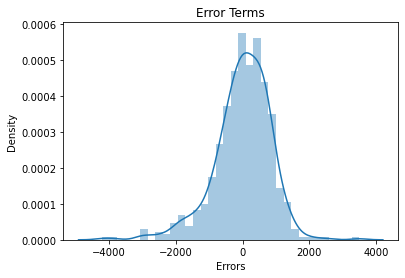

In [55]:
plot_res_dist(y_train, y_train_pred)

The graph looks normally distributed

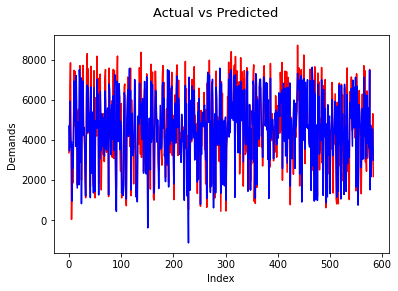

In [56]:
#  Now lets check Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 13)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and predicted are similar

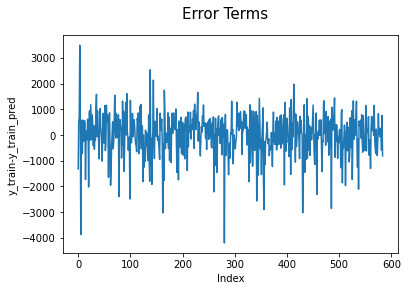

In [57]:
# Now lets see Error Terms

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Errors's are independent

In [58]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8119565903908114

The R2 is similar to model 8

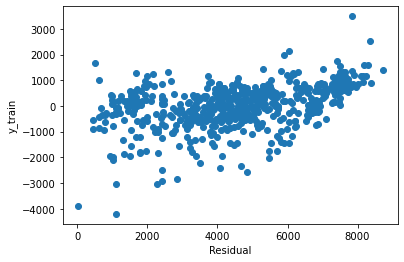

In [59]:
# now lets do a linearity check


# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [60]:
# Now lets predict values for test data set 

#Scale variables in X_test

num_vars = ['temp','atemp','hum','windspeed','Lifespan']



In [61]:
#Test data to be transformed only, no fitting

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [62]:
# preaparing columns from our final model

col = ['yr', 'season_spring', 'weekday_sun',
       'mnth_jul', 'temp', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
#Predict the values for test data

y_test_pred = lr.predict(X_test[col])

In [63]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8420943880027673

Text(0, 0.5, 'y_test_pred')

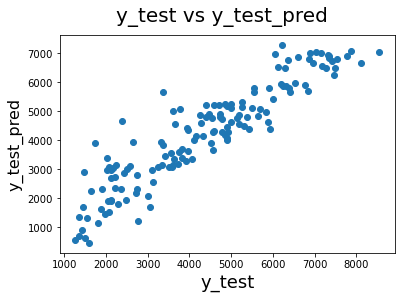

In [64]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Residual is constant to prediction

## Prediction test value vs plot test

In [65]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="red", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="blue",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

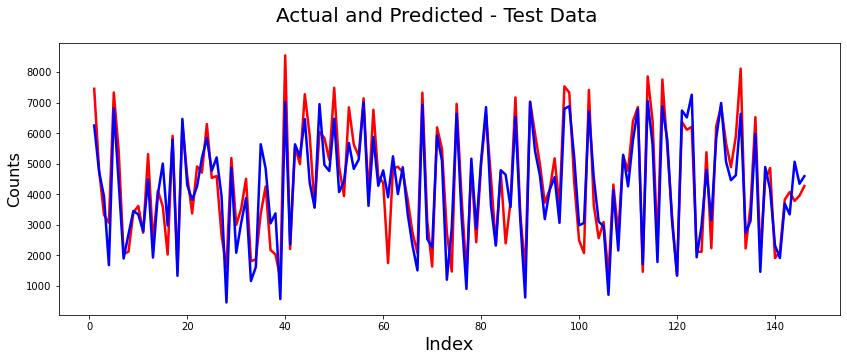

In [66]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Actual data and predicted data is very close

### Error Terms for test data plot

In [67]:
# Error terms

def plot_err_terms(act,pred):
    c = [i for i in range(1,147,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="green", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

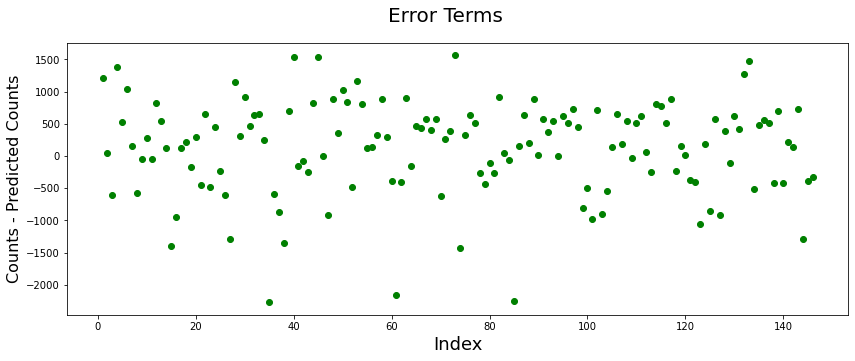

In [68]:
#Plotting error terms for test data

plot_err_terms(y_test,y_test_pred)

Due to random distibution of error terms it can be concluded that this is the best model as it has no pattern

In [69]:
# Lets start making predictions 
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Lifespan,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
# Let us start interpretting the RFE with manual model results
col = ['yr', 'season_spring', 'weekday_sun',
       'mnth_jul', 'temp', 'mnth_feb', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.51e-200
Time:                        21:52:04   Log-Likelihood:                -4765.9
No. Observations:                 584   AIC:                             9554.
Df Residuals:                     573   BIC:                             9602.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1438.6707    155.009     

Inferences drawn are 
- Previous data collection of users that will increase once situation is normal when compared to 2019
- Snow and Rain season had less demand, so the company should not budget extra for marketing and other stuff.
- As the highest demand is in september month and spring season they should focus on expansion in those period of time.

